In this File i Show how ovrcome from overfitting and Underfitting

import Basic Libre

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

create x , y variable

In [18]:
x,y = make_classification(n_samples = 9000,n_features=18,n_informative = 4,n_redundant = 12,random_state=4)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [22]:
train_scores,test_scores = list(),list()

In [24]:
values =[i for i in range(1,21)]

In [28]:
 for i in values:
     model=DecisionTreeClassifier(max_depth=i)
     model.fit(x_train,y_train)
     train_yhat=model.predict(x_train)
     train_acc=accuracy_score(y_train,train_yhat)
     test_yhat=model.predict(x_test)
     test_acc=accuracy_score(y_test,test_yhat)
     train_scores.append(train_acc)
     test_scores.append(test_acc)
     print('>%d,train:%.3f,test:%3f' %(i,train_acc,test_acc))

>1,train:0.834,test:0.840370
>2,train:0.851,test:0.853333
>3,train:0.867,test:0.869630
>4,train:0.897,test:0.888148
>5,train:0.906,test:0.897407
>6,train:0.929,test:0.910370
>7,train:0.951,test:0.930000
>8,train:0.966,test:0.941111
>9,train:0.976,test:0.938519
>10,train:0.981,test:0.941481
>11,train:0.986,test:0.937037
>12,train:0.988,test:0.941111
>13,train:0.991,test:0.938519
>14,train:0.993,test:0.932963
>15,train:0.995,test:0.932593
>16,train:0.997,test:0.933333
>17,train:0.998,test:0.931852
>18,train:0.999,test:0.931111
>19,train:0.999,test:0.932593
>20,train:1.000,test:0.934074


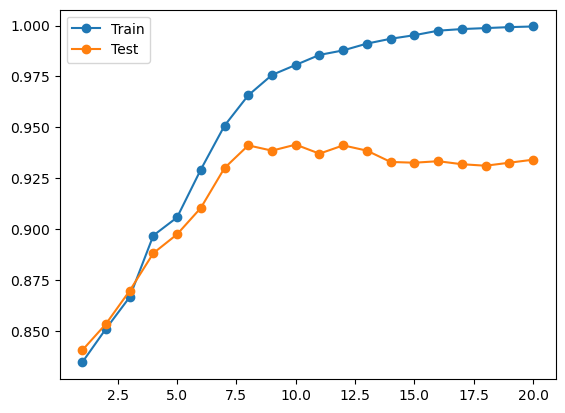

In [30]:
pyplot.plot(values,train_scores, '-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()

in above grap show that 20 in train is 100% but in test it show 93% is overfitting now 

In [37]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={'criterion':['gini','entropy'], 'max_depth':[2,4,6,10,20],'min_samples_split':[5,10,20,50,100]}
clf=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs = -1, scoring="accuracy")
clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [55]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_split=20)

In [57]:
print(accuracy_score(y_train,clf.best_estimator_.predict(x_train)))
print(accuracy_score(y_test,clf.best_estimator_.predict(x_test)))

0.9803174603174604
0.9344444444444444
